# **Import required libraries**

In [55]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


import seaborn as sns
sns.set(style="white", color_codes=True)

import warnings
warnings.filterwarnings("ignore")

# **Read credit card data using pandas.read_csv**

In [56]:
credit_card_data = pd.read_csv('/content/CC.csv')

#**Check Null values**

In [57]:
credit_card_data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

# 1. **Remove null values by the mean**

In [58]:
# fill null values with mean
credit_card_data = credit_card_data.fillna(credit_card_data.mean())
credit_card_data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

#**Visualizing data**

Correlation between **Purchases** and **OneOFF_Purchases**

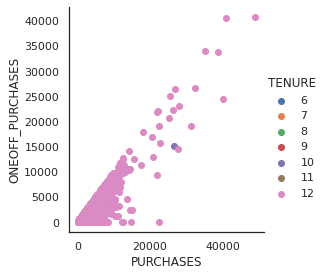

In [59]:
sns.FacetGrid(credit_card_data, hue="TENURE", height=4).map(plt.scatter, "PURCHASES", "ONEOFF_PURCHASES").add_legend()
plt.show()

2. Correlation between **CASH_ADVANCE_TRX** and **PURCHASES_TRX**

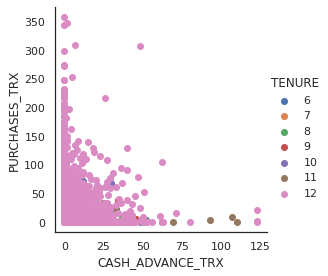

In [60]:
sns.FacetGrid(credit_card_data, hue="TENURE", height=4).map(plt.scatter, "CASH_ADVANCE_TRX", "PURCHASES_TRX").add_legend()
plt.show()

**Print input and target shape**

In [61]:
print("Original Data size:", credit_card_data.shape)
x = credit_card_data.iloc[:, 1:18]
y = credit_card_data.iloc[:, -1]

print("Inputs, Targets")
print(x.shape, y.shape)

Original Data size: (8950, 18)
Inputs, Targets
(8950, 17) (8950,)


# **samples of each Tenure**

In [62]:
# samples of each Tenure
print(credit_card_data["TENURE"].value_counts())

12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64


# **Use the elbow method to find a good number of clusters with the k-Means algorithm**

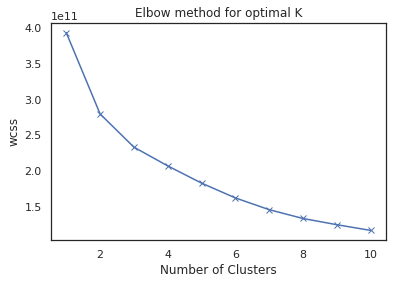

In [63]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, 'bx-')
plt.title('Elbow method for optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

#**Apply k-means and Calculate the silhouette score**

In [64]:
nclusters = 3 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(x)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(x)
print(y_cluster_kmeans)

[0 1 1 ... 0 0 0]


In [65]:
score = metrics.silhouette_score(x, y_cluster_kmeans)
print("Silhouette Score for K-means clustering is : ", score)

Silhouette Score for K-means clustering is :  0.46604142759108724


# **2.Feature scaling and then apply K-Means on the scaled features.**

In [66]:
# perform feature scaling 

scaler = preprocessing.StandardScaler()
scaler.fit(x)
X_scaled_array = scaler.transform(x)
X_scaled = pd.DataFrame(X_scaled_array, columns=x.columns)

score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
print("Silhouette Score after K-means clustering on the scaled features: ", score) 


Silhouette Score after K-means clustering on the scaled features:  0.20684753231383904


## Silhouette score did not improve after feature scaling. Because, feature scaling was not required for this dataset. We should perform function scaling when the scaling of a function is irrelevant or misleading,  not  when the scaling is significant.

#**3. Apply PCA on the same dataset and  Apply K-Means algorithm on the PCA result**

1. Apply PCA on scaled dataset

2. Apply K-means

3. Find the silhouette score on the PCA result

**1. Apply PCA**

In [67]:
# Standardizing the features
n_components = 2

pca = PCA(n_components=n_components, random_state=seed)
X_pca = pca.fit_transform(X_scaled)

**2. Apply K-means on PCA results**

In [68]:
nclusters = 3 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_pca)
#predict the cluster for each data point
y_cluster_kmeans = km.predict(X_pca)


**3. Finding silhouette score**

In [69]:
score = metrics.silhouette_score(X_pca, y_cluster_kmeans)
print("Silhouette Score after K-Means algorithm on the PCA result: ", score)

Silhouette Score after K-Means algorithm on the PCA result:  0.45236811834890944


**Silhouette score has improved from 0.2167 to 0.4523 after running k-Means algorithm on the PCA result.**

#**Visualization: PCA plot for 2 components** 

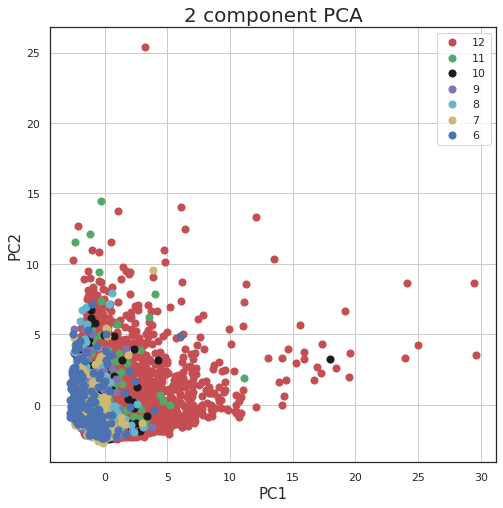

In [70]:
pca_Df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
finalDf = pd.concat([pca_Df, credit_card_data[['TENURE']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [12, 11, 10, 9, 8, 7, 6]
colors = ['r', 'g', 'k', 'm', 'c', 'y', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['TENURE'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#**Visualize clustering**

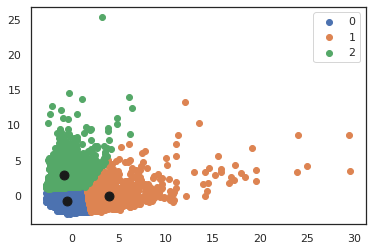

In [71]:
# Predict the labels of clusters.
label = km.fit_predict(X_pca)
 
# Getting unique labels
u_labels = np.unique(label)

# Getting the Centroids
centroids = km.cluster_centers_

# Plotting the results:
 
for i in u_labels:
    plt.scatter(X_pca[label == i , 0] , X_pca[label == i , 1] , label = i)

plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()